-0.09090909090909091 0.0 0.0
0.9090909090909091 0.0 0.0
<rebound.Orbit instance, a=2.1568627450980395 e=0.5363636363636364 inc=0.0 Omega=0.0 omega=0.0 f=0.0> 18.97655132331586


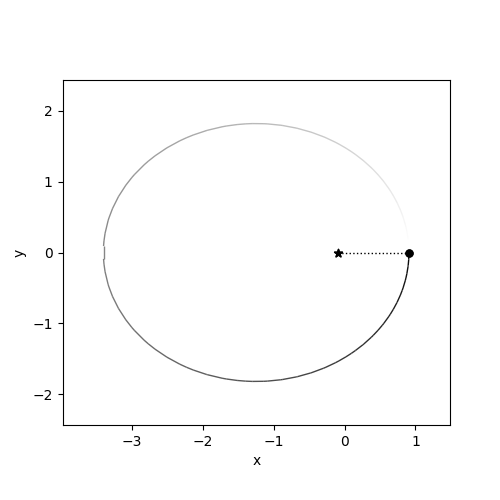

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import rebound
import time
import numpy as np
plt.close()

# set up the simulation
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=0.1, x=1, vy=1.3)
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=True)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o, o.P)
    

In [5]:
p_orb = sim.orbits()[0].P

xvec = [sim.particles[1].x]
yvec = [sim.particles[1].y]
op2, = plt.plot(xvec, yvec)

for i in range(200):
    # integrate for 1% of the orbit
    op.sim.integrate(sim.t + 0.01*p_orb)

    # store the trajectory of particle 2 (index 1)
    xvec.append(sim.particles[1].x)
    yvec.append(sim.particles[1].y)

    # update the plot to animate it
    op.update() #updateLimits=True) 
    op2.set_data((xvec,yvec)) 
    time.sleep(0.001)
    op.fig.canvas.draw()